In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'FigS14_data.xlsx'
xl = pd.ExcelFile(filename)
raw_od = xl.parse('figS14', index_col = None, header = None, skiprows = 49).iloc[:8,:92]
raw_od

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,E1,0.0536,0.0530,0.0528,0.0530,0.0531,0.0533,0.0535,0.0540,0.0550,...,0.4678,0.4710,0.4744,0.4784,0.4814,0.4846,0.4880,0.4914,0.4941,0.4976
1,E12,0.0531,0.0527,0.0524,0.0524,0.0526,0.0529,0.0531,0.0535,0.0543,...,0.3954,0.3981,0.4010,0.4037,0.4068,0.4092,0.4119,0.4145,0.4171,0.4201
2,F1,0.0540,0.0545,0.0548,0.0546,0.0548,0.0555,0.0557,0.0559,0.0574,...,0.4692,0.4731,0.4765,0.4801,0.4833,0.4862,0.4891,0.4927,0.4961,0.4995
3,F12,0.0527,0.0524,0.0522,0.0522,0.0523,0.0526,0.0528,0.0534,0.0540,...,0.3932,0.3966,0.4001,0.4028,0.4053,0.4082,0.4113,0.4138,0.4163,0.4196
4,G1,0.0533,0.0527,0.0526,0.0527,0.0526,0.0530,0.0534,0.0538,0.0546,...,0.4643,0.4677,0.4714,0.4747,0.4781,0.4813,0.4840,0.4883,0.4905,0.4944
5,G12,0.0534,0.0529,0.0529,0.0531,0.0531,0.0533,0.0536,0.0540,0.0549,...,0.4181,0.4213,0.4241,0.4268,0.4304,0.4329,0.4350,0.4379,0.4406,0.4436
6,H1,0.0554,0.0570,0.0565,0.0546,0.0573,0.0583,0.0562,0.0576,0.0590,...,0.4713,0.4753,0.4794,0.4841,0.4854,0.4887,0.4932,0.4950,0.4996,0.5025
7,H12,0.0527,0.0522,0.0521,0.0523,0.0524,0.0526,0.0526,0.0533,0.0539,...,0.4099,0.4127,0.4162,0.4192,0.4220,0.4250,0.4280,0.4311,0.4339,0.4365


In [3]:
# extract time data
time = xl.parse('figS14', index_col = None, header = None, skiprows = 47).iloc[0,1:92]
time = time/3600
time

1           0.0
2      0.166833
3        0.3335
4      0.500167
5      0.666833
        ...    
87    14.333639
88    14.500306
89    14.666972
90    14.833639
91    15.000306
Name: 0, Length: 91, dtype: object

In [4]:
# transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

population_types = np.concatenate([
    np.tile(np.array(['S','Sp']),4)
])

replicateID = np.concatenate([
    np.repeat(np.array([1,2,3,4]),2)
])

od.insert(1, 'population', population_types)
od.insert(1, 'replicate', replicateID)


# onto long form
od_long = pd.melt(od, id_vars = ['wellID','population','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'hours'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.hours = od_long.hours.astype(float)

od_long

,wellID,population,replicate,hours,OD600
0,E1,S,1,0.000000,0.0536
1,E12,Sp,1,0.000000,0.0531
2,F1,S,2,0.000000,0.0540
3,F12,Sp,2,0.000000,0.0527
4,G1,S,3,0.000000,0.0533
...,...,...,...,...,...
723,F12,Sp,2,15.000306,0.4196
724,G1,S,3,15.000306,0.4944
725,G12,Sp,3,15.000306,0.4436
726,H1,S,4,15.000306,0.5025


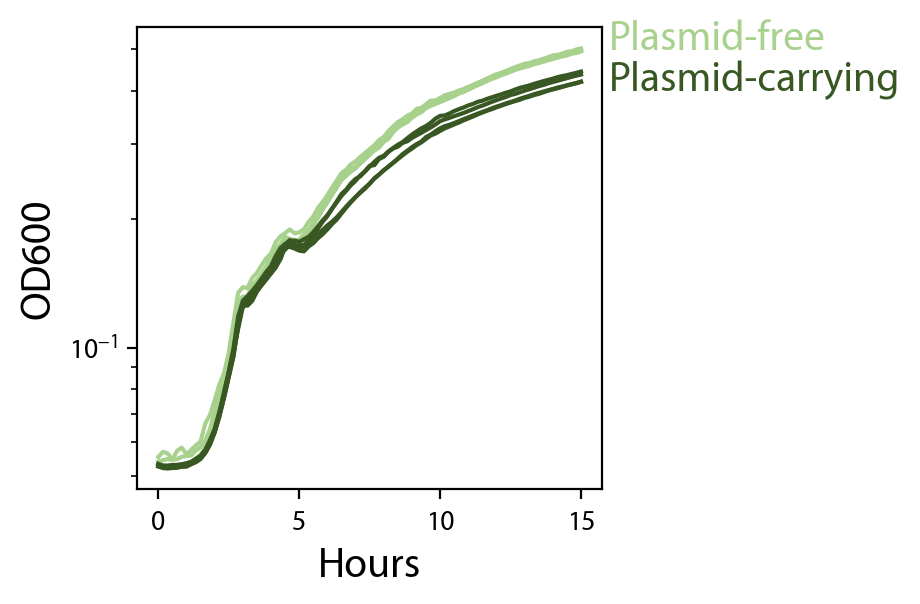

In [5]:
fig, axes = plt.subplots(1,1, figsize = (3,3), sharey = True, sharex = True, dpi=200)
# plt.subplots_adjust( wspace=0.5)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

sns.lineplot(data = od_long[od_long['population']=='S'], x = 'hours', y = 'OD600', ax = axes, 
             units = 'wellID', estimator = None, color = '#A9D18E', label = 'Plasmid-free' )
sns.lineplot(data = od_long[od_long['population']=='Sp'], x = 'hours', y = 'OD600', ax = axes, 
             units = 'wellID', estimator = None, color = '#385723', label = 'Plasmid-carrying')
axes.get_legend().remove()

axes.text(16, 0.5, 'Plasmid-free', fontsize = 15, color ='#A9D18E')
axes.text(16, 0.4, 'Plasmid-carrying', fontsize = 15, color ='#385723')

axes.set_ylabel('OD600', fontsize = 15)
axes.set_xlabel('Hours', fontsize = 15)

axes.set_yscale('log')

plt.show()
